In [1]:
%load_ext autoreload
%autoreload 2

# Differences and energies

In [2]:
import numpy as np
import os
import sys

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px


if __package__ is None:

    module_path = os.path.abspath(os.path.join('..'))
    sys.path.append(module_path)

    __package__ = os.path.basename(module_path)


from explanations.data_enhancing import proc_info, melt


In [ ]:
fn = '../data/ensemble_mutation_effect_analysis/2023_06_05_164913/summarise_simulation/tabulated_mutation_info.csv'
info = pd.read_csv(fn)
info, num_group_cols, num_bs_cols, numerical_cols, key_cols, mutation_log, bs_range_cols = proc_info(info)
infom = melt(info[info['sample_name'] == 'RNA_0'], num_group_cols, num_bs_cols, numerical_cols, key_cols, mutation_log, bs_range_cols, include_log=True)

## Diffs

/home/wadh6511/Kode/env_circuits/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


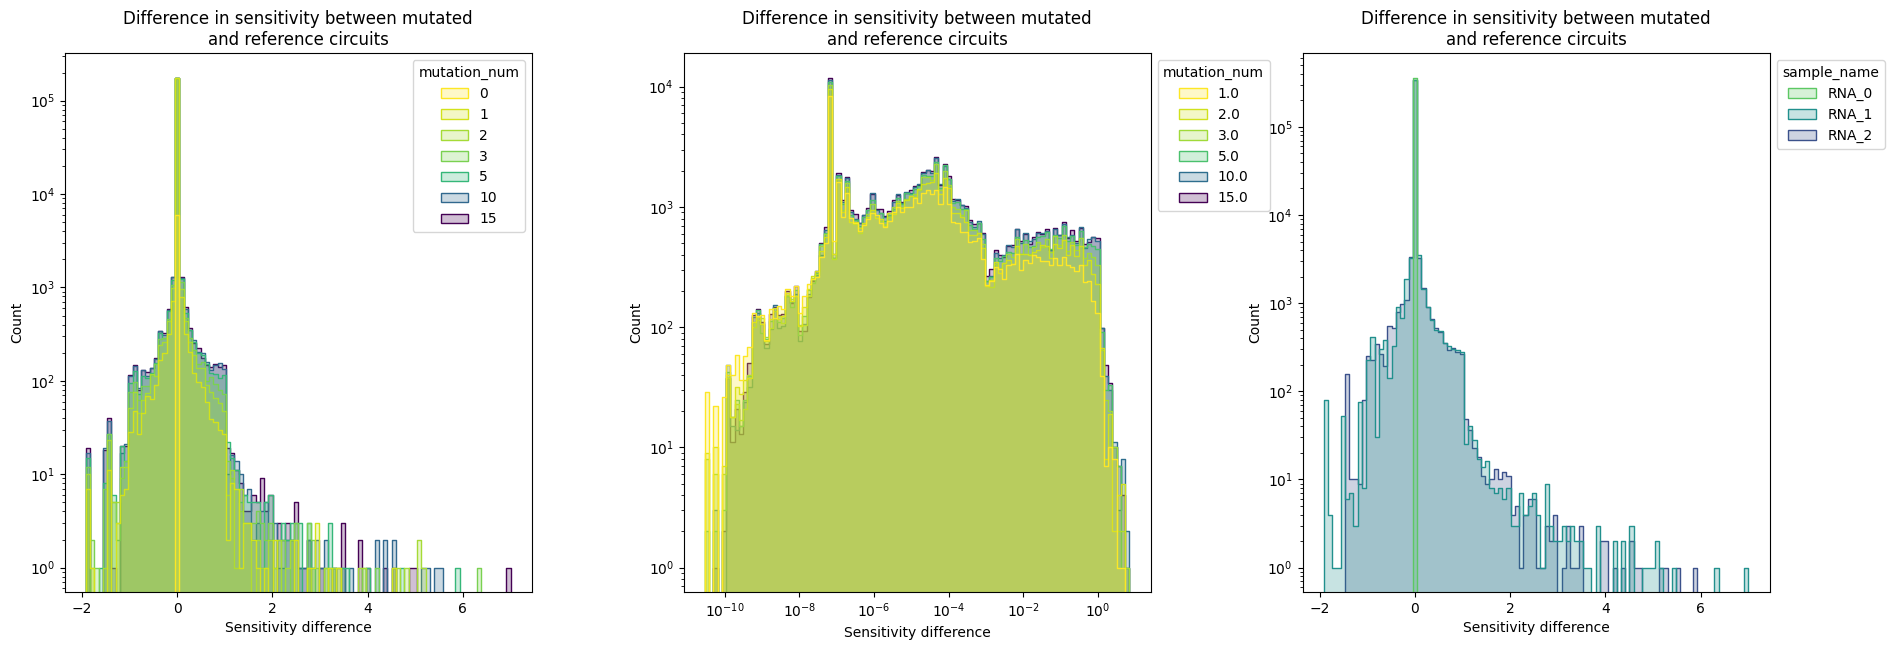

In [15]:

fig = plt.figure(figsize=(22, 7))
fig.subplots_adjust(hspace=0.325, wspace=0.325)

ax = plt.subplot(1,3,1)
sns.histplot(info, x='sensitivity_wrt_species-6_diff_to_base_circuit', hue='mutation_num', element='step', log_scale=[False, True], bins=100, palette='viridis_r')
plt.xlabel('Sensitivity difference')
plt.title('Difference in sensitivity between mutated\nand reference circuits')

ax = plt.subplot(1,3,2)
sns.histplot(info[info['sensitivity_wrt_species-6_diff_to_base_circuit'] != 0], x=info['sensitivity_wrt_species-6_diff_to_base_circuit'].abs(), hue='mutation_num', element='step', log_scale=[True, True], bins=100, palette='viridis_r')
plt.xlabel('Sensitivity difference')
plt.title('Difference in sensitivity between mutated\nand reference circuits')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

ax = plt.subplot(1,3,3)
sns.histplot(info, x='sensitivity_wrt_species-6_diff_to_base_circuit', hue='sample_name', element='step', log_scale=[False, True], bins=100, palette='viridis_r')
plt.xlabel('Sensitivity difference')
plt.title('Difference in sensitivity between mutated\nand reference circuits')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


# %%
# plt.figure(figsize=(6*len(info['mutation_num'].unique()), 5))
# for i, m in enumerate(info['mutation_num'].unique()):
#     if m != 0:
#         ax = plt.subplot(1, len(info['mutation_num'].unique()), i)
#         sns.histplot(info[(info['mutation_num'] == m)], x='sensitivity_wrt_species-6_diff_to_base_circuit', stat='count', element='step', fill=False, log_scale=[False, True], bins=100, palette='viridis_r')
#         plt.legend([str(m)], title='Mutations')
#         plt.xlabel('Sensitivity difference')
#         # plt.xlim([info_summ[('sensitivity_wrt_species-6_diff_to_base_circuit', 'std')].min() - 0.01, info_summ[('sensitivity_wrt_species-6_diff_to_base_circuit', 'std')].max() + 0.01])
#         # plt.ylim([0,165])
# plt.suptitle('Difference in sensitivity between mutated\nand reference circuits')



## Energies: Diffs and std's

Text(0.5, 0, 'Energy (kcal)')

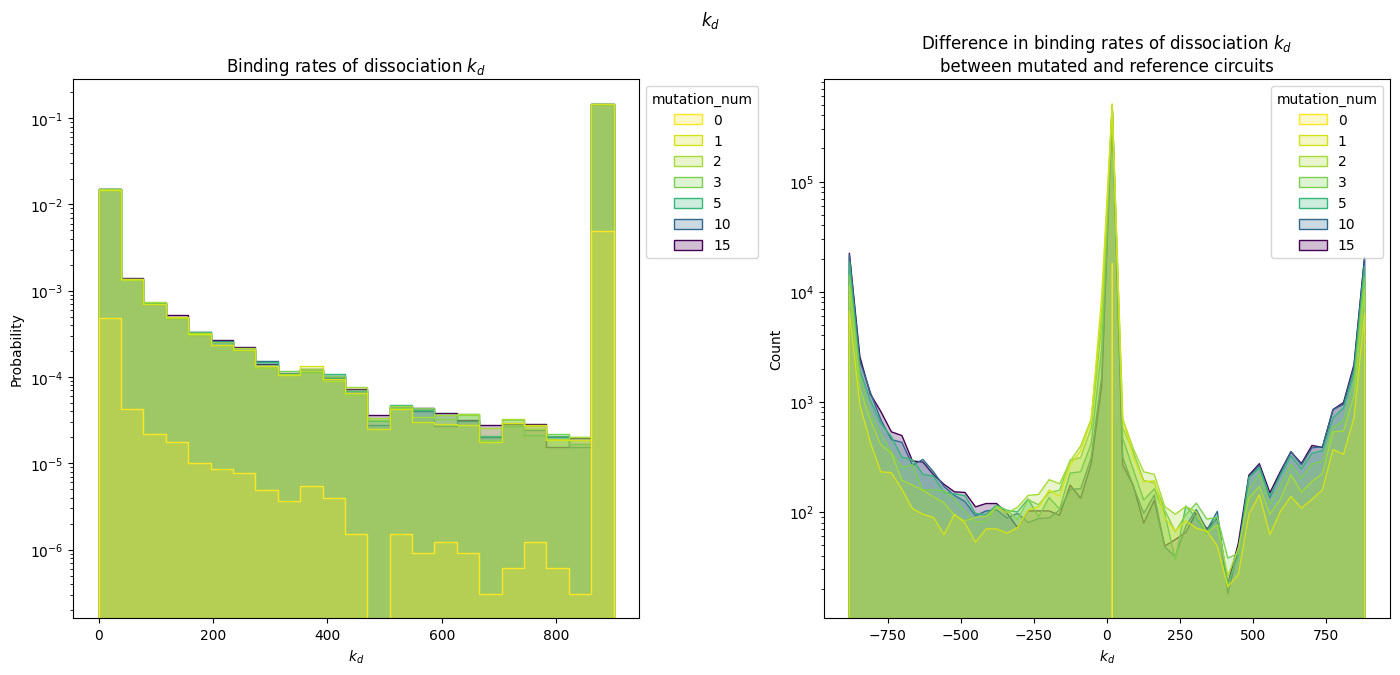

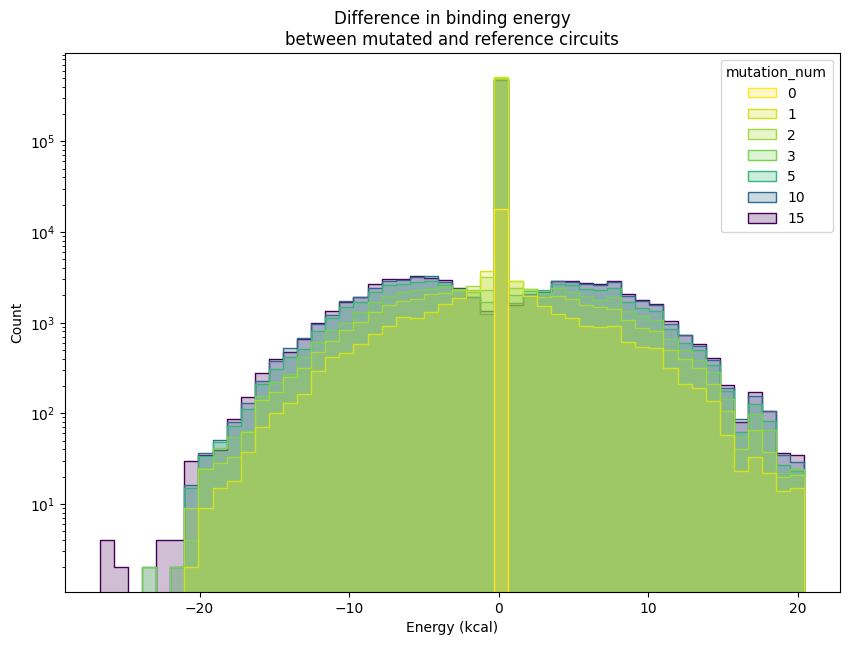

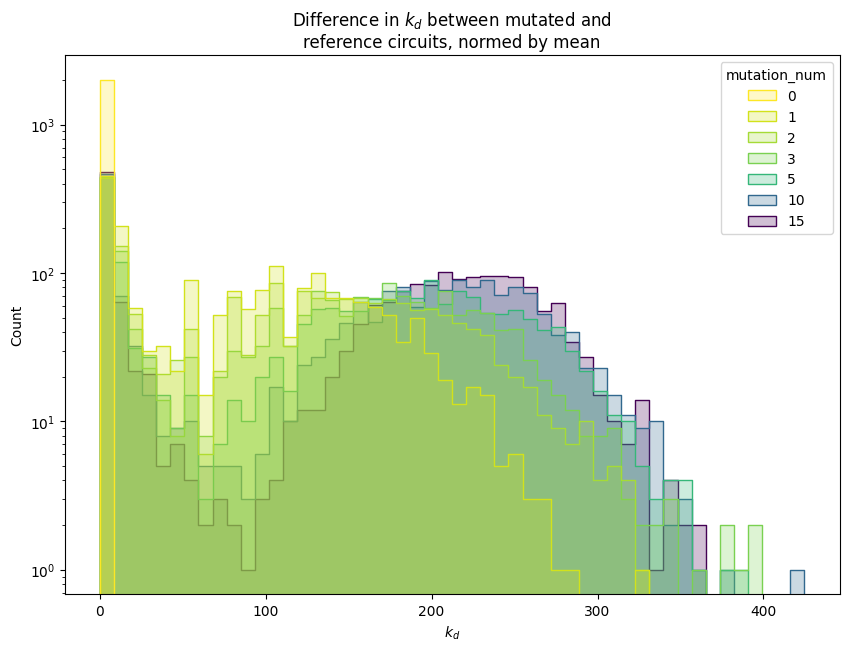

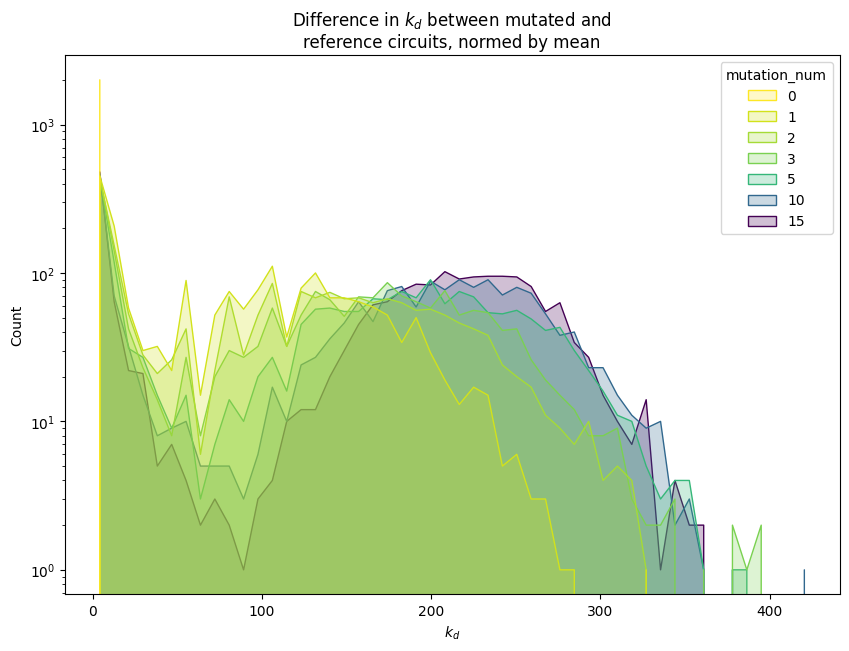

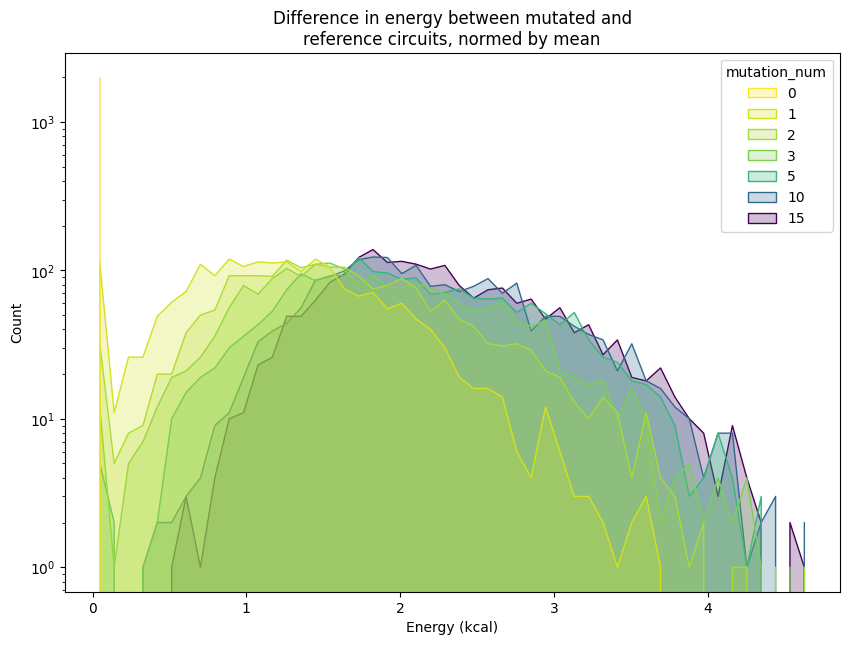

In [5]:
# %%
# sns.jointplot(infom, x='energies', y='RMSE', hue='mutation_num')

# %%

fig = plt.figure(figsize=(17, 7))
fig.subplots_adjust(hspace=0.325, wspace=0.325)

ax = plt.subplot(1,2,1)
sns.histplot(infom, x='binding_rates_dissociation', hue='mutation_num', element='step', stat='probability', log_scale=[False, True], palette='viridis_r')
plt.xlabel('$k_d$')
plt.title('Binding rates of dissociation $k_d$')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


# %%
ax = plt.subplot(1,2,2)
sns.histplot(infom, x='binding_rates_dissociation_diffs', hue='mutation_num', element='poly', bins=50, log_scale=[False, True], palette='viridis_r')
plt.xlabel('$k_d$')
plt.title('Difference in binding rates of dissociation $k_d$\nbetween mutated and reference circuits')

plt.suptitle('$k_d$')

# %%
plt.figure(figsize=(10,7))
sns.histplot(infom, x='energies_diffs', hue='mutation_num', element='step', bins=50, log_scale=[False, True], palette='viridis_r')
plt.xlabel('Energy (kcal)')
plt.title('Difference in binding energy\nbetween mutated and reference circuits')

# %%
e = infom.groupby(['circuit_name', 'mutation_num', 'sample_name'], as_index=False).agg({c: lambda x: np.std(x) / np.max([1, np.mean(x)]) for c in [
    'binding_rates_dissociation_diffs', 'energies_diffs'
]})

plt.figure(figsize=(10,7))
sns.histplot(e, x='binding_rates_dissociation_diffs', hue='mutation_num', element='step', bins=50, log_scale=[False, True], palette='viridis_r')
plt.title('Difference in $k_d$ between mutated and\nreference circuits, normed by mean')
plt.xlabel('$k_d$')

# %%
plt.figure(figsize=(10,7))
sns.histplot(e, x='binding_rates_dissociation_diffs', hue='mutation_num', element='poly', bins=50, log_scale=[False, True], palette='viridis_r')
plt.title('Difference in $k_d$ between mutated and\nreference circuits, normed by mean')
plt.xlabel('$k_d$')

# %%
plt.figure(figsize=(10,7))
sns.histplot(e, x='energies_diffs', hue='mutation_num', element='poly', bins=50, log_scale=[False, True], palette='viridis_r')
plt.title('Difference in energy between mutated and\nreference circuits, normed by mean')
plt.xlabel('Energy (kcal)')


Text(0.5, 0.98, 'Circuit interactions')

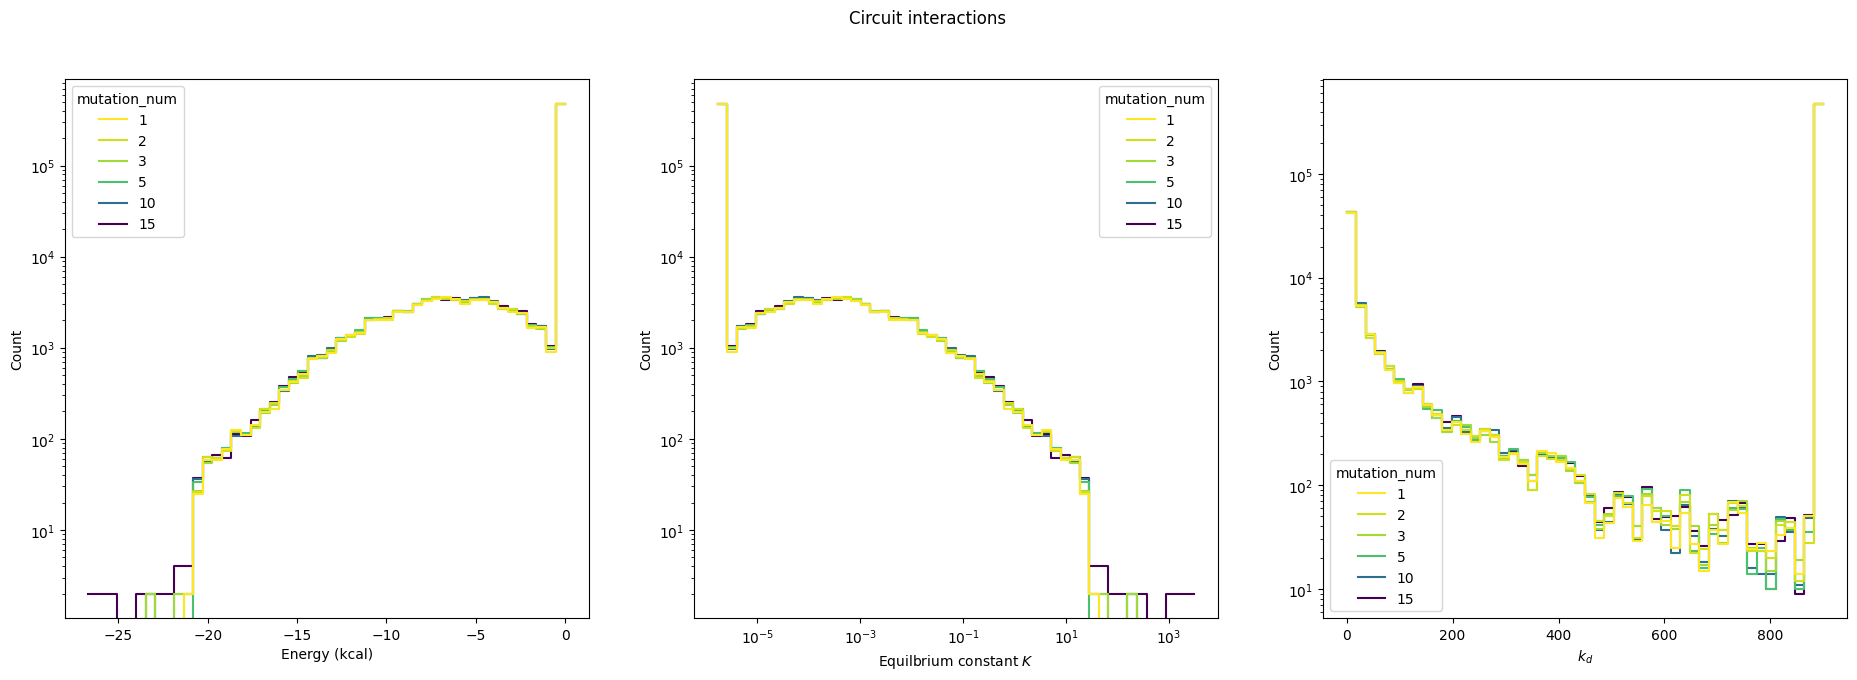

In [6]:

# %%
plt.figure(figsize=(23,7))
ax = plt.subplot(1,3,1)
sns.histplot(infom[infom['mutation_num'] != 0], x='energies', hue = 'mutation_num', element='step', stat='count', log_scale=[False, True], bins=50, palette='viridis_r', fill=False)
plt.xlabel('Energy (kcal)')
ax = plt.subplot(1,3,2)
sns.histplot(infom[infom['mutation_num'] != 0], x='eqconstants', hue = 'mutation_num', element='step', stat='count', log_scale=[True, True], bins=50, palette='viridis_r', fill=False)
plt.xlabel('Equilbrium constant $K$')
ax = plt.subplot(1,3,3)
sns.histplot(infom[infom['mutation_num'] != 0], x='binding_rates_dissociation', hue = 'mutation_num', element='step', stat='count', log_scale=[False, True], bins=50, palette='viridis_r', fill=False)
plt.xlabel('$k_d$')

plt.suptitle('Circuit interactions')


<AxesSubplot: xlabel='mutation_num', ylabel='num_groups'>

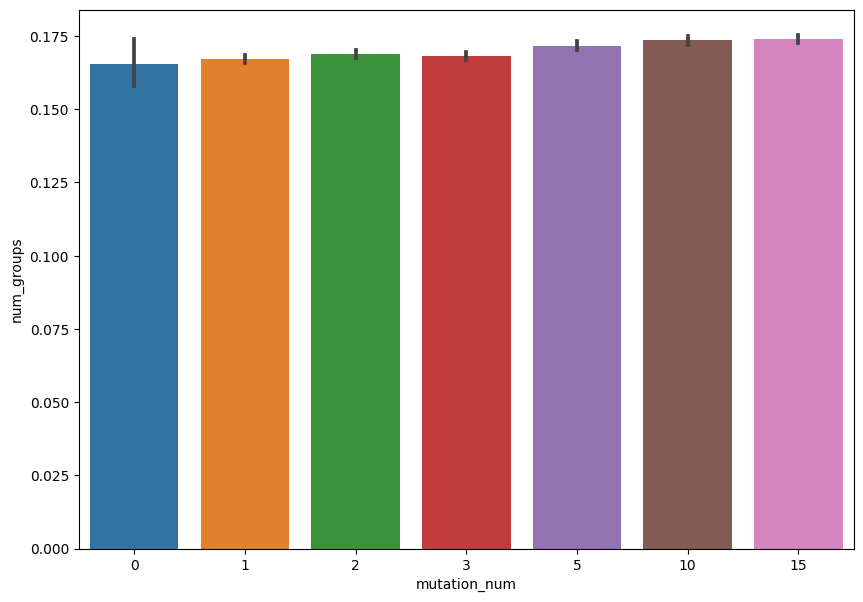

In [7]:

# %%
plt.figure(figsize=(10,7))
sns.barplot(infom, x='mutation_num', y = 'num_groups')

Equilibrium constants above 1

/tmp/ipykernel_155210/125671451.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0,infom[(infom['eqconstants'] >= 1)]['eqconstants'].count().max()])
/tmp/ipykernel_155210/125671451.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0,infom[(infom['eqconstants'] >= 1)]['eqconstants'].count().max()])
/tmp/ipykernel_155210/125671451.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0,infom[(infom['eqconstants'] >= 1)]['eqconstants'].count().max()])
/tmp/ipykernel_155210/125671451.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0,infom[(infom['eqconstants'] >= 1)]['eqconstants'].count().max()])
/tmp/ipykernel_155210/125671451.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0,infom[(infom['eqconstants'] >= 1)]['eqconstants'].count(

<AxesSubplot: xlabel='eqconstants', ylabel='Count'>

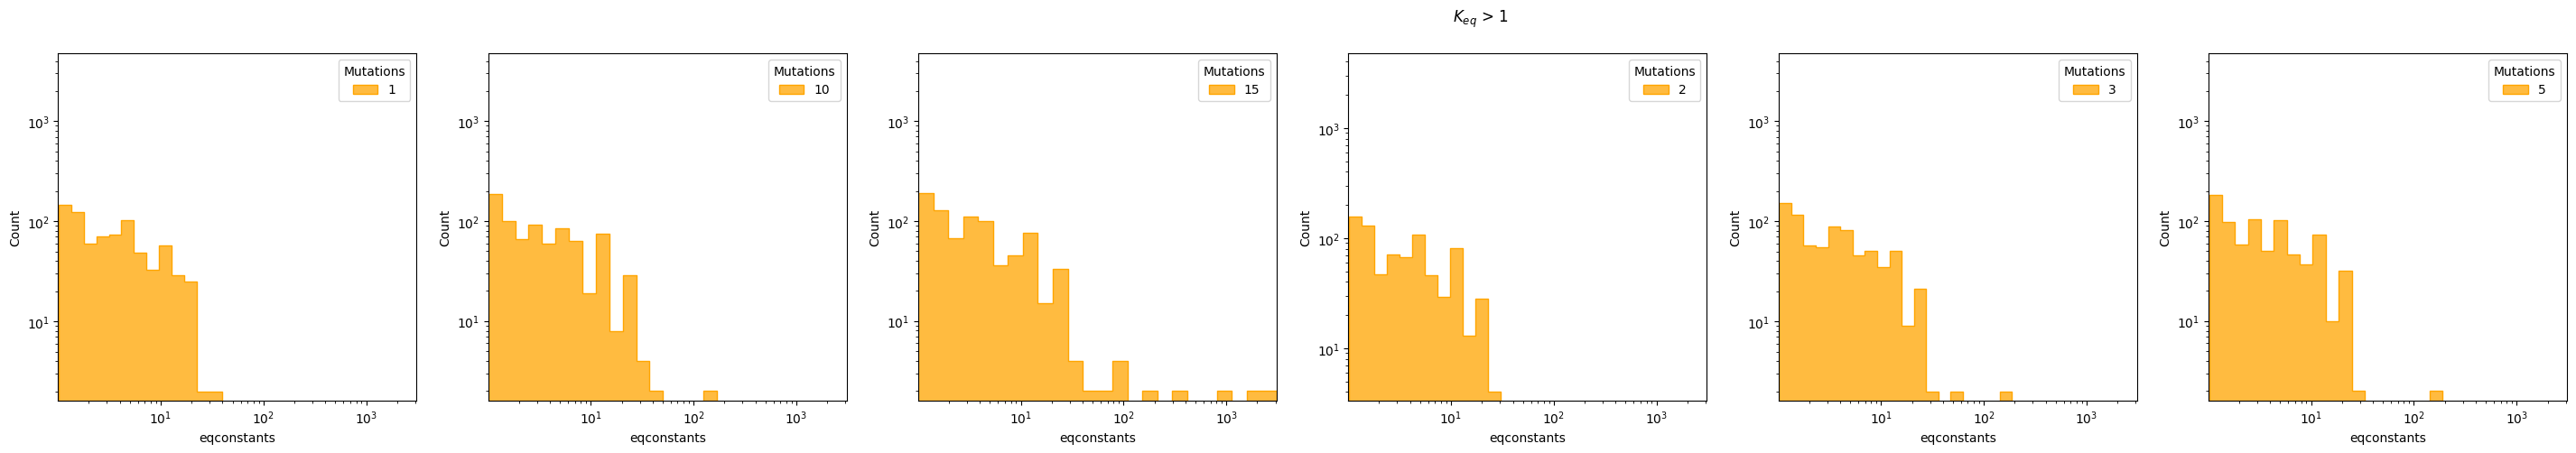

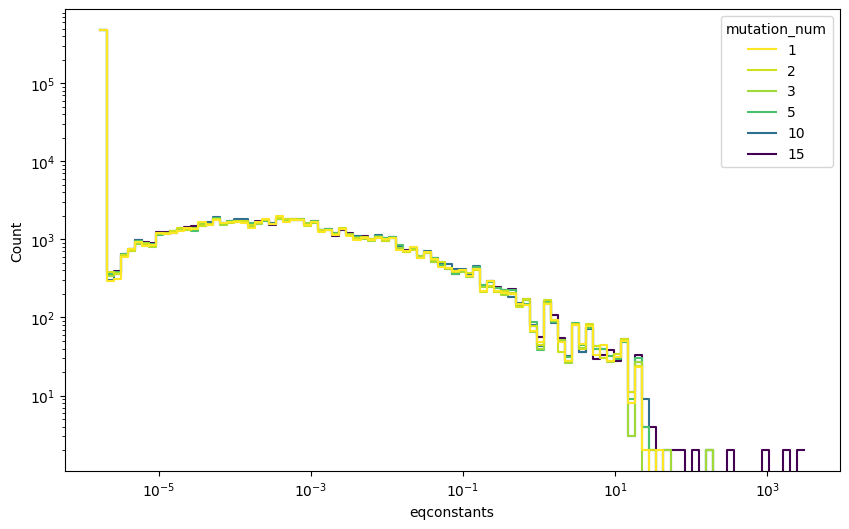

In [8]:

plt.figure(figsize=(6*len(info['mutation_num'].unique()), 5))
for i, m in enumerate(info['mutation_num'].unique()):
    if m != 0:
        ax = plt.subplot(1, len(info['mutation_num'].unique()), i)
        sns.histplot(infom[(infom['eqconstants'] >= 1) & (infom['mutation_num'] == m)], x='eqconstants', stat='count', element='step', fill=True, log_scale=[True, True], color='orange')
        plt.legend([str(m)], title='Mutations')
        plt.xlim([infom[(infom['eqconstants'] >= 1)]['eqconstants'].min(), infom[(infom['eqconstants'] >= 1)]['eqconstants'].max()])
        plt.ylim([0,infom[(infom['eqconstants'] >= 1)]['eqconstants'].count().max()])
        
plt.suptitle('$K_{eq}$ > 1')

plt.figure(figsize=(10,6))
sns.histplot(infom[infom['mutation_num'] != 0], x='eqconstants', stat='count', element='step', hue='mutation_num', fill=False, log_scale=[True, True], bins=100, palette='viridis_r')



Text(0.5, 1.0, 'RMSE by sample')

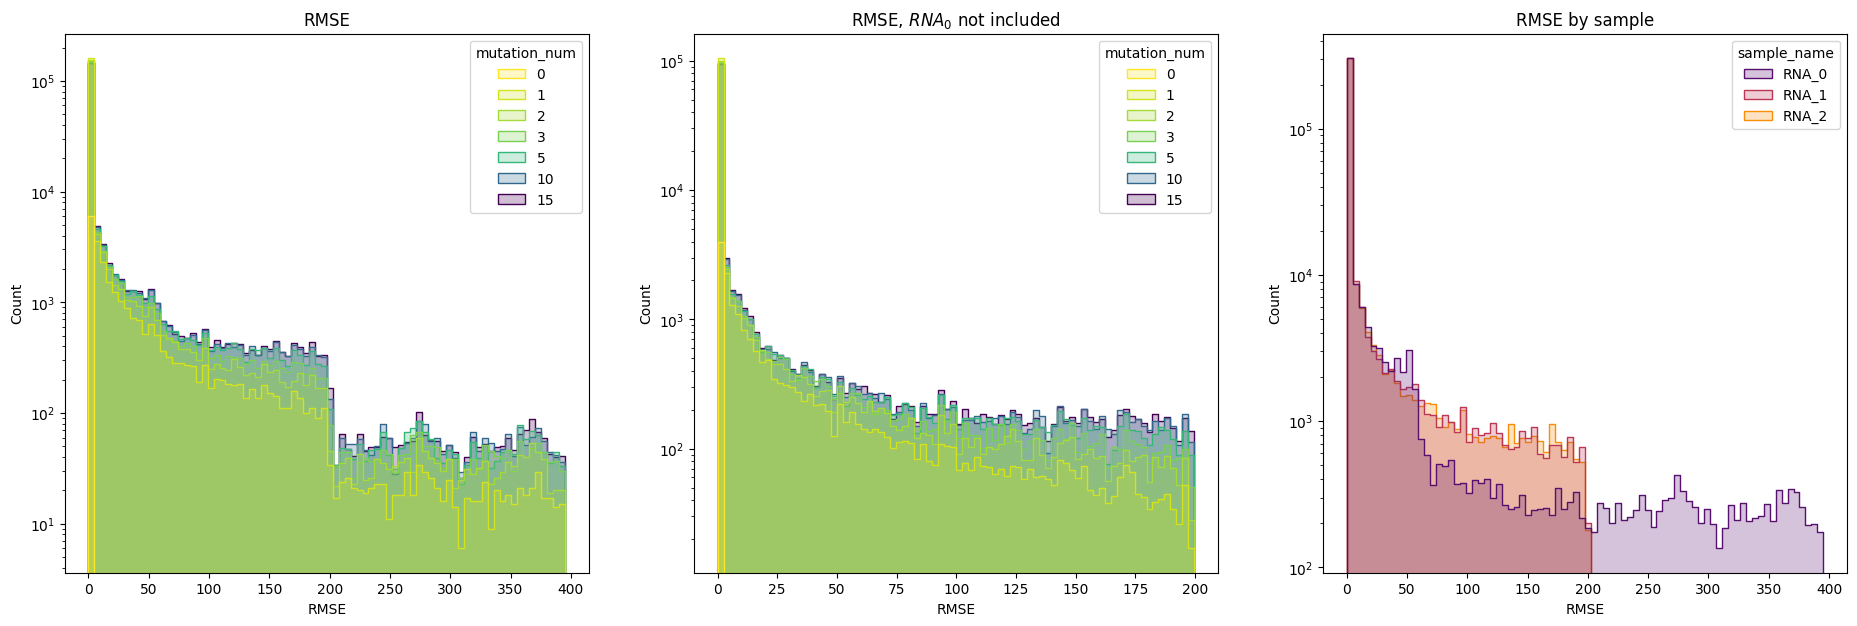

In [9]:
plt.figure(figsize=(23,7))
ax = plt.subplot(1,3,1)
sns.histplot(info, x='RMSE', hue='mutation_num', element='step', log_scale=[False, True], bins=80, palette='viridis_r')
plt.title('RMSE')

ax = plt.subplot(1,3,2)
sns.histplot(info[info['sample_name'] != 'RNA_0'], x='RMSE', hue='mutation_num', element='step', log_scale=[False, True], bins=80, palette='viridis_r')
plt.title('RMSE, $RNA_0$ not included')

ax = plt.subplot(1,3,3)
sns.histplot(info, x='RMSE', hue='sample_name', element='step', log_scale=[False, True], bins=80, palette='inferno')
plt.title('RMSE by sample')
